In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('consumo_hogar(n).csv')

In [12]:
print("Primeras filas del dataframe:")
display(df.head())

Primeras filas del dataframe:


,Temperatura,Personas,Electrodomesticos,Consumo_kWh
0,25.334940,5.0,19.0,NaN
1,22.129065,1.0,9.0,36.865393
2,18.111903,4.0,12.0,46.911185
3,26.743169,3.0,18.0,54.105738
4,25.508359,3.0,9.0,42.110414


In [34]:
print("Descripción del dataframe:")
df.describe()


Descripción del dataframe:


,Temperatura,Personas,Electrodomesticos,Consumo_kWh
count,9500.000000,9500.000000,9500.000000,9500.000000
mean,21.889592,2.986283,12.514843,46.270245
std,4.889308,1.386487,4.460102,14.152485
min,1.772137,1.000000,5.000000,16.252730
25%,18.716000,2.000000,9.000000,38.492979
50%,21.892799,3.000000,12.497895,45.360519
75%,25.063394,4.000000,16.000000,52.223483
max,44.946714,5.000000,20.000000,208.006885


In [13]:
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperatura        9500 non-null   float64
 1   Personas           9500 non-null   float64
 2   Electrodomesticos  9500 non-null   float64
 3   Consumo_kWh        9500 non-null   float64
dtypes: float64(4)
memory usage: 312.6 KB


In [14]:
# Ver valores nulos por columna
print(df.isnull().sum())


Temperatura          500
Personas             500
Electrodomesticos    500
Consumo_kWh          500
dtype: int64


In [15]:
columnas_a_imputar = ['Temperatura', 'Personas', 'Electrodomesticos']

# Imputar con la media solo esas columnas
for col in columnas_a_imputar:
    media = df[col].mean()
    df[col].fillna(media, inplace=True)

# Verificación: solo debería haber nulos en 'Consumo_kWh'
print(df.isnull().sum())


Temperatura            0
Personas               0
Electrodomesticos      0
Consumo_kWh          500
dtype: int64


C:\Users\quint\AppData\Local\Temp\ipykernel_5404\1286721938.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(media, inplace=True)


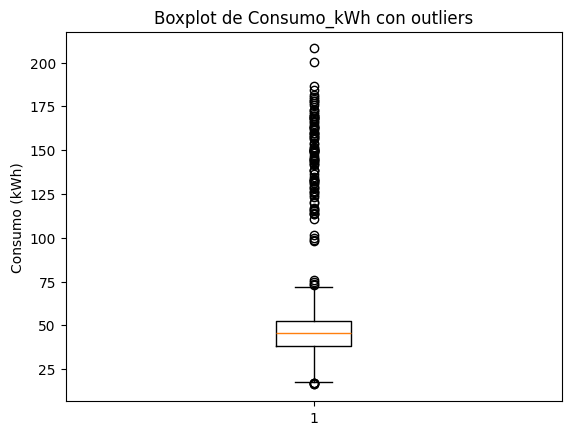

Cantidad de outliers detectados en Consumo_kWh: 105
13      131.031644
18      145.762588
51      170.639065
184     145.022723
220     132.487555
           ...    
9418    172.982132
9573    169.548072
9658    158.889216
9677    110.568710
9836    156.064342
Name: Consumo_kWh, Length: 105, dtype: float64


In [17]:
# Quitar valores nulos de la columna para evitar errores
consumo = df['Consumo_kWh'].dropna()

# Visualizar con boxplot
plt.boxplot(consumo)
plt.title('Boxplot de Consumo_kWh con outliers')
plt.ylabel('Consumo (kWh)')
plt.show()

# Cálculo del IQR
Q1 = consumo.quantile(0.25)
Q3 = consumo.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = consumo[(consumo < lower_bound) | (consumo > upper_bound)]

print(f"Cantidad de outliers detectados en Consumo_kWh: {len(outliers)}")
print(outliers)

In [18]:
# Eliminar filas con valores nulos en Consumo_kWh para poder detectar outliers
df_no_null = df.dropna(subset=['Consumo_kWh'])

# Calcular Q1, Q3 e IQR
Q1 = df_no_null['Consumo_kWh'].quantile(0.25)
Q3 = df_no_null['Consumo_kWh'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame eliminando los outliers
df_sin_outliers = df_no_null[
    (df_no_null['Consumo_kWh'] >= lower_bound) & (df_no_null['Consumo_kWh'] <= upper_bound)
]

# Mostrar tamaño antes y después
print(f"Filas antes de eliminar outliers: {len(df_no_null)}")
print(f"Filas después de eliminar outliers: {len(df_sin_outliers)}")

Filas antes de eliminar outliers: 9500
Filas después de eliminar outliers: 9395


In [19]:
# Imputar solo columnas independientes con la media
columnas_a_imputar = ['Temperatura', 'Personas', 'Electrodomesticos']
for col in columnas_a_imputar:
    df[col].fillna(df[col].mean(), inplace=True)

# Eliminar filas donde 'Consumo_kWh' es NaN
df = df.dropna(subset=['Consumo_kWh'])

# Calcular IQR para eliminar outliers en 'Consumo_kWh'
Q1 = df['Consumo_kWh'].quantile(0.25)
Q3 = df['Consumo_kWh'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers
df_limpio = df[
    (df['Consumo_kWh'] >= lower_bound) & (df['Consumo_kWh'] <= upper_bound)
]

# Mostrar forma final del DataFrame limpio
print(f"Forma del DataFrame limpio: {df_limpio.shape}")

Forma del DataFrame limpio: (9395, 4)


C:\Users\quint\AppData\Local\Temp\ipykernel_5404\3720899984.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


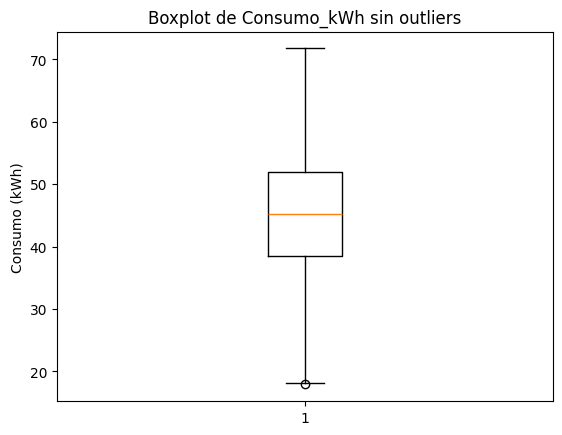

In [20]:
df_limpio.to_csv('consumo_hogar_limpio.csv', index=False)
# Visualizar el boxplot del DataFrame limpio
plt.boxplot(df_limpio['Consumo_kWh'])
plt.title('Boxplot de Consumo_kWh sin outliers')
plt.ylabel('Consumo (kWh)')
plt.show()


In [22]:
print("Información del DataFrame:")
print(df_limpio.isnull().sum())

Información del DataFrame:
Temperatura          0
Personas             0
Electrodomesticos    0
Consumo_kWh          0
dtype: int64


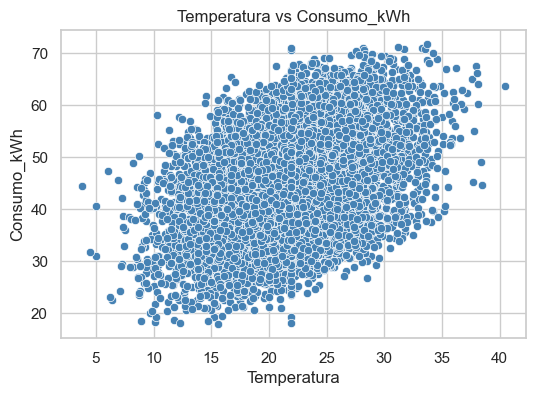

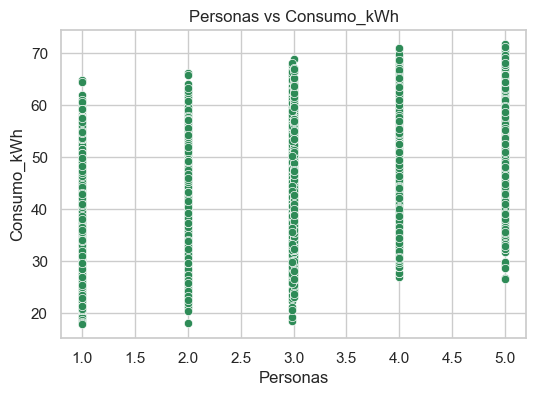

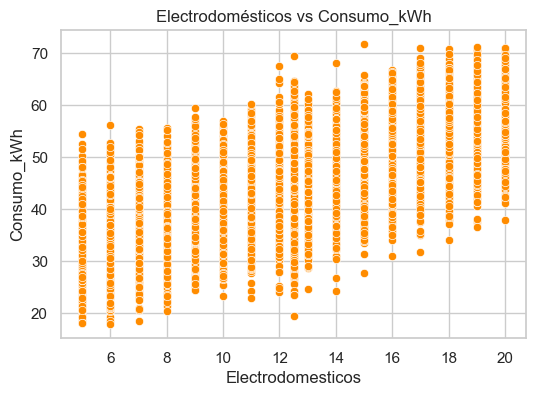

In [26]:
# Estilo de los gráficos
sns.set(style="whitegrid")

# Temperatura vs Consumo
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_limpio, x='Temperatura', y='Consumo_kWh', color='steelblue')
plt.title('Temperatura vs Consumo_kWh')
plt.show()

# Personas vs Consumo
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_limpio, x='Personas', y='Consumo_kWh', color='seagreen')
plt.title('Personas vs Consumo_kWh')
plt.show()

# Electrodomesticos vs Consumo
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_limpio, x='Electrodomesticos', y='Consumo_kWh', color='darkorange')
plt.title('Electrodomésticos vs Consumo_kWh')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

#modelo con datos completos

# Variables independientes (X) y variable objetivo (y)
X = df_limpio[['Temperatura', 'Personas', 'Electrodomesticos']]
y = df_limpio['Consumo_kWh']

# Crear y entrenar el modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(X, y)

# Mostrar coeficientes y el intercepto
print("Coeficientes del modelo1:")
for nombre, coef in zip(X.columns, modelo_lineal.coef_):
    print(f"{nombre}: {coef:.4f}")

print(f"\nIntercepto (término independiente): {modelo_lineal.intercept_:.4f}")


Coeficientes del modelo1:
Temperatura: 0.7915
Personas: 2.9757
Electrodomesticos: 1.4951

Intercepto (término independiente): 0.3061


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# modelo con datos separados

# Separar variables independientes y dependiente
X = df_limpio[['Temperatura', 'Personas', 'Electrodomesticos']]
y = df_limpio['Consumo_kWh']

# División 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo con el conjunto de entrenamiento
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

# Mostrar coeficientes e intercepto
print("Coeficientes del modelo1.1:")
for nombre, coef in zip(X.columns, modelo_lineal.coef_):
    print(f"{nombre}: {coef:.4f}")

print(f"\nIntercepto: {modelo_lineal.intercept_:.4f}")


Coeficientes del modelo1.1:
Temperatura: 0.7947
Personas: 2.9706
Electrodomesticos: 1.4950

Intercepto: 0.2221


In [39]:
# Crear características polinómicas de grado 2
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

# Entrenar modelo
modelo_poly2 = LinearRegression()
modelo_poly2.fit(X_train_poly2, y_train)

# Mostrar número de características generadas
print(f"Modelo grado 2 entrenado con {X_train_poly2.shape[1]} características")


Modelo grado 2 entrenado con 9 características


In [40]:
# Crear características polinómicas de grado 3
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

# Entrenar modelo
modelo_poly3 = LinearRegression()
modelo_poly3.fit(X_train_poly3, y_train)

# Mostrar número de características generadas
print(f"Modelo grado 3 entrenado con {X_train_poly3.shape[1]} características")


Modelo grado 3 entrenado con 19 características


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
y_pred_lineal = modelo_lineal.predict(X_test)
y_pred_poly2 = modelo_poly2.predict(X_test_poly2)
y_pred_poly3 = modelo_poly3.predict(X_test_poly3)

# Calcular métricas para cada modelo
mse_lineal = mean_squared_error(y_test, y_pred_lineal)
r2_lineal = r2_score(y_test, y_pred_lineal)

mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)

mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
r2_poly3 = r2_score(y_test, y_pred_poly3)

# Mostrar resultados en tabla
print(f"{'Modelo':<25} {'MSE':<10} {'R2':<10}")
print(f"{'-'*45}")
print(f"{'Regresión lineal':<25} {mse_lineal:.2f} {r2_lineal:.2f}")
print(f"{'Regresión polinómica grado 2':<25} {mse_poly2:.2f} {r2_poly2:.2f}")
print(f"{'Regresión polinómica grado 3':<25} {mse_poly3:.2f} {r2_poly3:.2f}")


Modelo                    MSE        R2        
---------------------------------------------
Regresión lineal          12.47 0.86
Regresión polinómica grado 2 12.49 0.86
Regresión polinómica grado 3 12.51 0.86


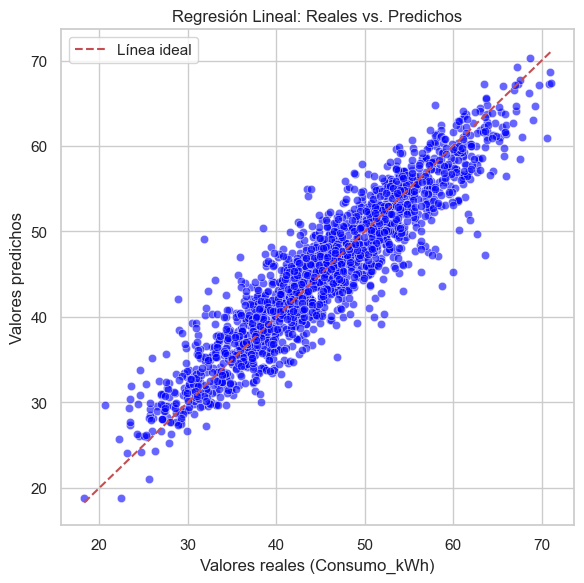

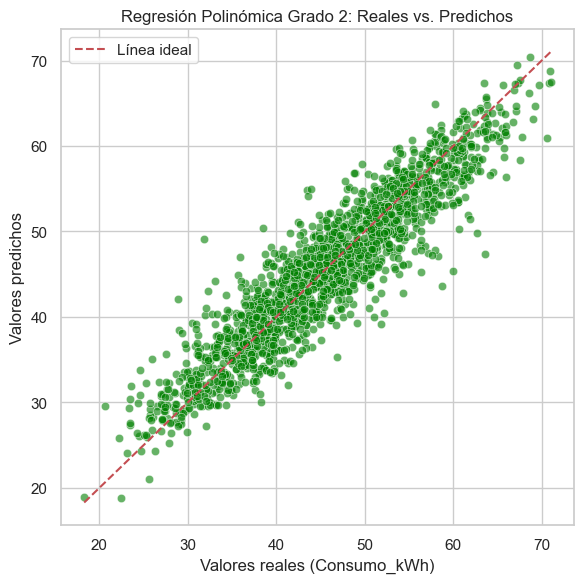

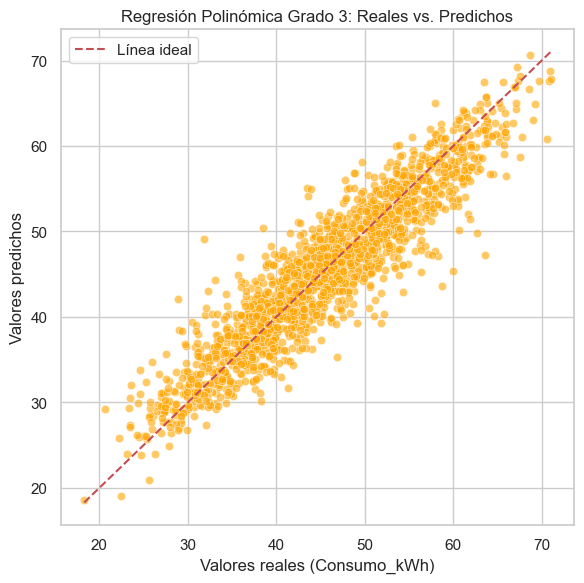

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de modelos y predicciones
modelos = [
    ("Regresión Lineal", y_pred_lineal, 'blue'),
    ("Regresión Polinómica Grado 2", y_pred_poly2, 'green'),
    ("Regresión Polinómica Grado 3", y_pred_poly3, 'orange')
]

# Crear una figura para cada modelo
for nombre, y_pred, color in modelos:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred, color=color, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Línea ideal')
    plt.xlabel('Valores reales (Consumo_kWh)')
    plt.ylabel('Valores predichos')
    plt.title(f'{nombre}: Reales vs. Predichos')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

